In [2]:
import pickle
import tensorflow as tf
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
import librosa.display # for visualization 
import IPython.display as ipd # to play audio file
from scipy.io.wavfile import write # to write audio files to directory
import scipy 
import os

In [3]:
with open('raw_data.pkl', 'rb') as raw_data:
    audio_data = pickle.load(raw_data)

In [4]:
ms.use('seaborn-muted')
%matplotlib inline

In [5]:
cwd = os.getcwd()
new_folder = "audio_dataset_v2"
folder = os.path.join(cwd, new_folder)
os.makedirs(folder)

In [6]:
for i in range(24):
    scipy.io.wavfile.write(str(folder)+"\\audio_"+str(i+1)+".wav", 10000, audio_data[0][i])
    

In [11]:
audio_path_1 = str(folder)+"\\audio_9.wav"
sample , sample_rate = librosa.load(audio_path_1)
print(sample)
print(sample_rate)
print(audio_path_1)
ipd.Audio(audio_path_1)

[-0.003994   -0.00161804  0.00146664 ... -0.43144614 -0.23804075
  0.        ]
22050
C:\Users\Goutham Indiran\Deep Learning\Group_Project\audio_dataset_v2\audio_9.wav


In [ ]:
#Visualizing the audio file

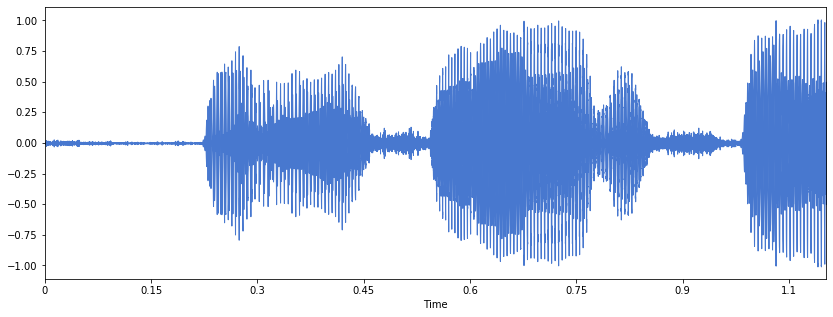

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sample, sr=sample_rate)

In [ ]:
# Spectogram
#stft() converts data into short term Fourier transform. 
#STFT converts signals such that we can know the amplitude of the given frequency at a given time.
#Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. 
#.specshow is used to display a spectrogram.

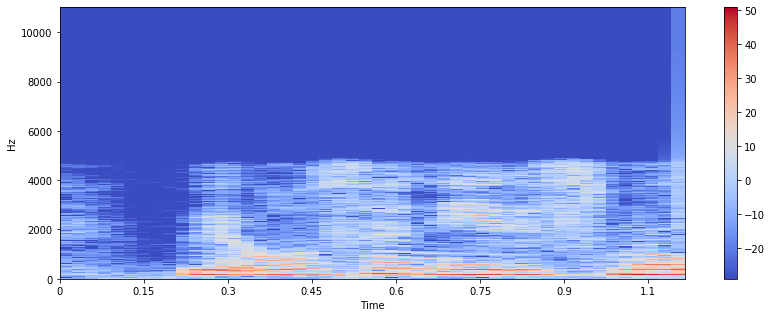

In [13]:
X = librosa.stft(sample)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

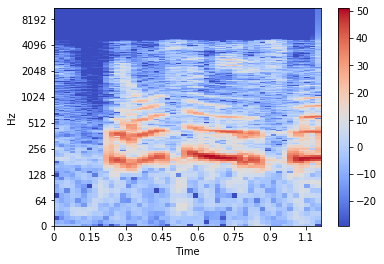

In [14]:
#The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip.
#Since we see that all action is taking place at the bottom of the spectrum, 
#we can convert the frequency axis to a logarithmic one.

librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

In [ ]:
#1. Spectral Centroid
#The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words 
#It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:

(24311,)
22050
(48,)
[1806.08576505 1709.49022434 1543.12031714 1399.47045563 1098.17287924
  913.50836997  819.81498893  743.716641    734.02305302  429.40981109
  472.4121877   652.7926871   762.6439479   743.45676483  603.10948425
  607.29840948  619.02351929  592.62784895  603.39645584  750.60491545
 1511.41756192 2363.21142365 2300.95339735 1339.50002565  962.46046683
  910.86956779  718.51748651  475.65544086  460.11509591  668.89758087
  871.26403064  927.80151434  954.19739492  901.5065132   851.42511029
  846.23611153  932.54310321 1559.83111902 2615.25491412 2817.22351089
 2816.57513341 2346.62214691  610.42027533  413.70204704  472.6074128
  541.75872558  656.61193932 1045.20917396]


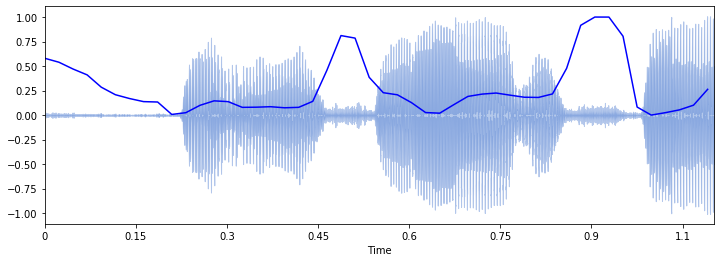

In [40]:
import sklearn
print(sample.shape)
print(sample_rate)
spectral_centroids = librosa.feature.spectral_centroid(sample, sr=sample_rate)[0]
print(spectral_centroids.shape)
print(spectral_centroids)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(sample, axis=0):
    return sklearn.preprocessing.minmax_scale(sample, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sample, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [ ]:
#2. Spectral Rolloff

#It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0.
#To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at
#lower frequencies.

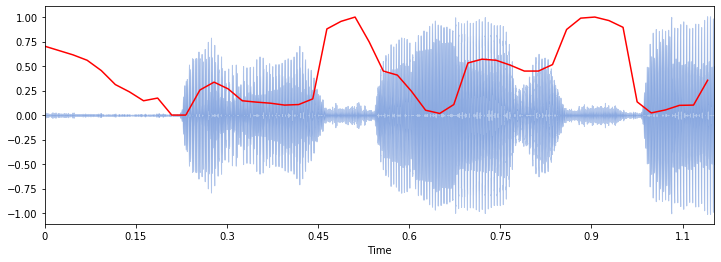

In [33]:
spectral_rolloff = librosa.feature.spectral_rolloff(sample+0.01, sr=sample_rate)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(sample, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [ ]:
#Spectral bandwidth

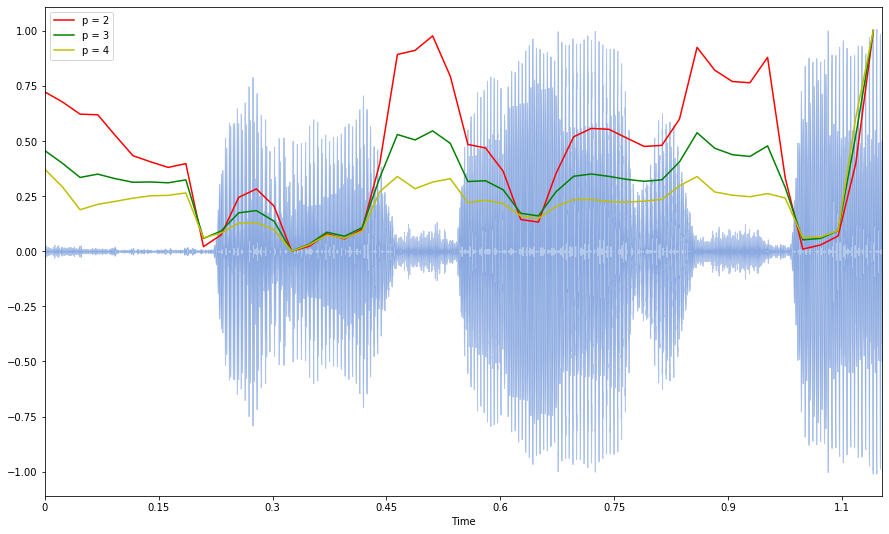

In [42]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sample+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sample+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sample+0.01, sr=sample_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(sample, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
#Zero-Crossing Rate

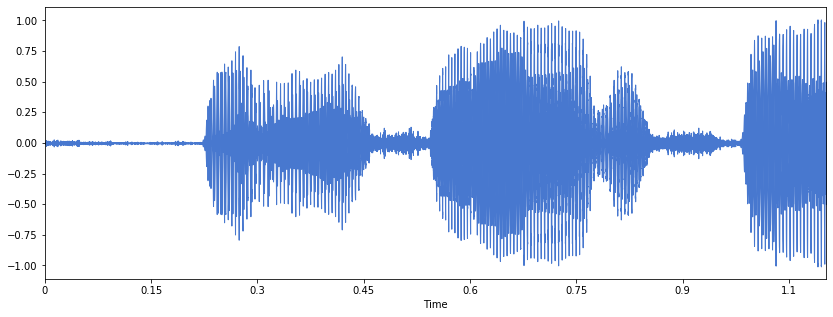

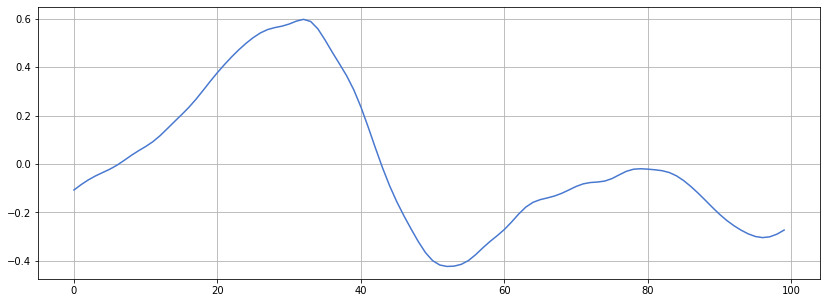

In [44]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sample, sr=sample_rate)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(sample[n0:n1])
plt.grid()

In [46]:
zero_crossings = librosa.zero_crossings(sample[n0:n1], pad=False)
print(sum(zero_crossings))

2


In [ ]:
#Mel-Frequency Cepstral Coefficients(MFCCs)

#The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features
#(usually about 10–20) which concisely describe the overall shape of a spectral envelope. 
#It models the characteristics of the human voice.

(20, 48)


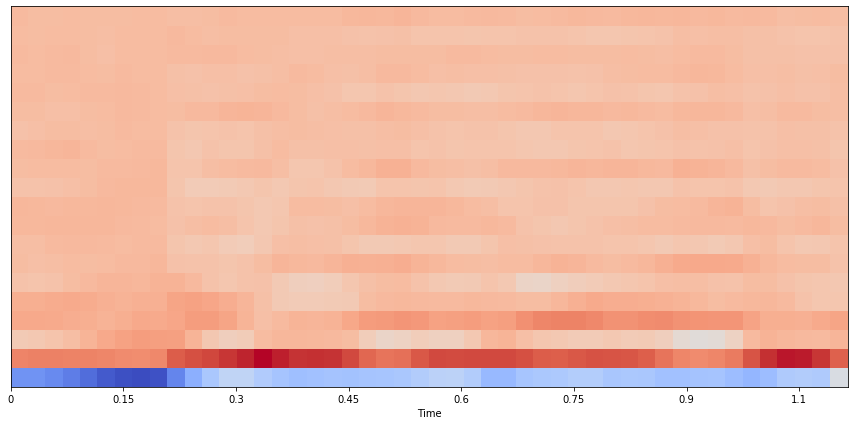

In [47]:
mfccs = librosa.feature.mfcc(sample, sr=sample_rate)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
#6. Chroma feature

#A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, 
#{C, C#, D, D#, E, …, B}, is present in the signal. In short, 
#It provides a robust way to describe a similarity measure between music pieces.

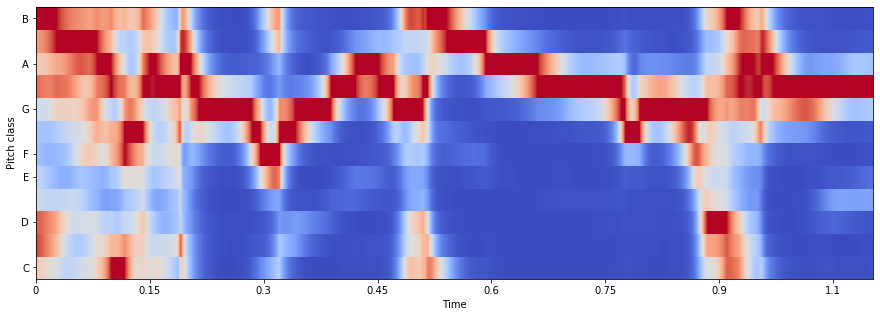

In [53]:
chromagram = librosa.feature.chroma_stft(sample, sr=sample_rate, hop_length=5)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=5, cmap='coolwarm')